In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
import seaborn as sns
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans

# Get data

In [2]:
# data kaggle 
df= pd.read_csv("./netflix_titles.csv",parse_dates=['date_added'])

In [3]:
df.shape

(7787, 12)

Conjunto de datos externos de IMDB

------------------ data.basics - Contains the following information for titles -------------------

tconst (string) - alphanumeric unique identifier of the title

titleType (string) – the type/format of the title (e.g. movie, short, tvseries, tvepisode, video, etc)

primaryTitle (string) – the more popular title / the title used by the filmmakers on promotional materials at the point of release

originalTitle (string) - original title, in the original language

isAdult (boolean) - 0: non-adult title; 1: adult title

startYear (YYYY) – represents the release year of a title. In the case of TV Series, it is the series start year

endYear (YYYY) – TV Series end year. ‘\N’ for all other title types

runtimeMinutes – primary runtime of the title, in minutes

genres (string array) – includes up to three genres associated with the title

title.crew.tsv.gz – Contains the director and writer information for all the titles in IMDb.


-------------------- data rating  - Contains the following information for titles --------------------

tconst (string) - alphanumeric unique identifier of the title

averageRating – weighted average of all the individual user ratings

numVotes - number of votes the title has received

In [4]:
#external data is loaded from IMDB
df_ag1= pd.read_csv("./data_basics.tsv",sep='\t',header=0)

df_ag2= pd.read_csv("./data_rating.tsv",sep='\t',header=0)

C:\Users\jonat\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df_ag1.head(3)

tconst titleType            primaryTitle           originalTitle  \
0  tt0000001     short              Carmencita              Carmencita   
1  tt0000002     short  Le clown et ses chiens  Le clown et ses chiens   
2  tt0000003     short          Pauvre Pierrot          Pauvre Pierrot   

  isAdult startYear endYear runtimeMinutes                    genres  
0       0      1894      \N              1         Documentary,Short  
1       0      1892      \N              5           Animation,Short  
2       0      1892      \N              4  Animation,Comedy,Romance

In [6]:
df_ag2.head(3)

tconst  averageRating  numVotes
0  tt0000001            5.7      1684
1  tt0000002            6.0       207
2  tt0000003            6.5      1421

In [7]:
#dimension of loaded data
print('data basics:',df_ag1.shape ,'data rating:',df_ag2.shape)

#union datasets
joint_data=df_ag1.merge(df_ag2,left_on='tconst',right_on='tconst',how='inner')

#dimension data after union of external data
print('dimension second dataframe:',joint_data.shape)

data basics: (7634822, 9) data rating: (1123707, 3)
dimension second dataframe: (1123707, 11)


In [8]:
# original data is grouped with external data extracted from imdb
data = df.merge(joint_data,left_on='title',right_on='originalTitle',how='inner')

#data merged
data.describe(include='all', datetime_is_numeric = True ).head(4)

show_id   type     title         director  \
count    20310  20310     20310            14005   
unique    5678      2      5678             3162   
top      s6394  Movie  The Gift  Mohammed Alhmly   
freq       114  13642       114               91   

                                                     cast        country  \
count                                               18892          19364   
unique                                               5037            563   
top     Beren Saat, Mehmet Günsür, Metin Akdülger, Mel...  United States   
freq                                                  114           7285   

       date_added  release_year rating  duration  ...  titleType primaryTitle  \
count       20256       20310.0  20305     20310  ...      20310        20310   
unique        NaN           NaN     14       202  ...         10         5849   
top           NaN           NaN  TV-MA  1 Season  ...  tvEpisode     The Gift   
freq          NaN           NaN   7837      3986  ...       7886          113   

       originalTitle  isAdult startYear endYear  runtimeMinutes  genres  \
count          20310  20310.0     20310   20310           20310   20310   
unique          5678      3.0       175      64             286     783   
top         The Gift      0.0      2017      \N              \N  Comedy   
freq             114  20053.0      1494   19192            3769    1603   

       averageRating numVotes  
count        20310.0  20310.0  
unique           NaN      NaN  
top              NaN      NaN  
freq             NaN      NaN  

[4 rows x 23 columns]

# Data Cleansing

In [9]:
#type data and dimension
print(data.dtypes,"Dimensiones:",data.shape, sep='\n')

show_id                   object
type                      object
title                     object
director                  object
cast                      object
country                   object
date_added        datetime64[ns]
release_year               int64
rating                    object
duration                  object
listed_in                 object
description               object
tconst                    object
titleType                 object
primaryTitle              object
originalTitle             object
isAdult                   object
startYear                 object
endYear                   object
runtimeMinutes            object
genres                    object
averageRating            float64
numVotes                   int64
dtype: object
Dimensiones:
(20310, 23)


In [10]:
#valores unicos
print('Valores unicos:',data.nunique(axis=0), "Cantidad de datos por columnas:",data.count(), sep='\n' )

Valores unicos:
show_id            5678
type                  2
title              5678
director           3162
cast               5037
country             563
date_added         1387
release_year         71
rating               14
duration            202
listed_in           451
description        5677
tconst            20310
titleType            10
primaryTitle       5849
originalTitle      5678
isAdult               3
startYear           175
endYear              64
runtimeMinutes      286
genres              783
averageRating        90
numVotes           4810
dtype: int64
Cantidad de datos por columnas:
show_id           20310
type              20310
title             20310
director          14005
cast              18892
country           19364
date_added        20256
release_year      20310
rating            20305
duration          20310
listed_in         20310
description       20310
tconst            20310
titleType         20310
primaryTitle      20310
originalTitle     20310
isA

In [11]:
data.isnull().sum()

show_id              0
type                 0
title                0
director          6305
cast              1418
country            946
date_added          54
release_year         0
rating               5
duration             0
listed_in            0
description          0
tconst               0
titleType            0
primaryTitle         0
originalTitle        0
isAdult              0
startYear            0
endYear              0
runtimeMinutes       0
genres               0
averageRating        0
numVotes             0
dtype: int64

In [12]:
data.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s1  TV Show     3%                NaN   
2      s2    Movie   7:19  Jorge Michel Grau   
3      s3    Movie  23:59       Gilbert Chan   
4      s4    Movie      9        Shane Acker   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
2  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
3  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
4  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   

  date_added  release_year rating   duration  ...  titleType primaryTitle  \
0 2020-08-14          2020  TV-MA  4 Seasons  ...    tvMovie           3%   
1 2020-08-14          2020  TV-MA  4 Seasons  ...   tvSeries           3%   
2 2016-12-23          2016  TV-MA     93 min  ...      movie         7:19   
3 2018-12-20          2011      R     78 min  ...      movie        23:59   
4 2017-11-16          2009  PG-13     80 min  ...  videoGame            9   

  originalTitle isAdult startYear endYear runtimeMinutes  \
0            3%       0      2011      \N             27   
1            3%       0      2016    2020             49   
2          7:19       0      2016      \N             94   
3         23:59       0      2011      \N             78   
4             9       0      1996      \N             \N   

                      genres averageRating numVotes  
0       Drama,Fantasy,Sci-Fi           7.8     2056  
1        Action,Drama,Sci-Fi           7.4    21815  
2              Drama,History           6.0      569  
3                     Horror           4.6      848  
4  Adventure,Fantasy,Mystery           6.0       73  

[5 rows x 23 columns]

In [13]:
#verificacion de columnas con valores perdidos
data.columns[data.isnull().any()]

Index(['director', 'cast', 'country', 'date_added', 'rating'], dtype='object')

In [14]:
#columnas con datos NAN en porcentajes
for i in data.columns:
    null_rate = data[i].isna().sum() / len(data) * 100 
    if null_rate > 0 :
        print(f"{i}'s valores nulos : {null_rate}%")

director's valores nulos : 31.0438207779419%
cast's valores nulos : 6.9817823732151645%
country's valores nulos : 4.65780403741999%
date_added's valores nulos : 0.2658788774002954%
rating's valores nulos : 0.02461841457410143%


Director: el 28% de la columna director tiene valores faltantes se procede a eliminar ya que tampoco brinda tanta informacion

Cast: se eliminaran solamente los valores faltantes

In [15]:
#ubicacion de los valores duplicados
data[data['description'].duplicated()].count()

show_id           14633
type              14633
title             14633
director           9949
cast              13736
country           13877
date_added        14586
release_year      14633
rating            14633
duration          14633
listed_in         14633
description       14633
tconst            14633
titleType         14633
primaryTitle      14633
originalTitle     14633
isAdult           14633
startYear         14633
endYear           14633
runtimeMinutes    14633
genres            14633
averageRating     14633
numVotes          14633
dtype: int64

In [16]:
#lista de valores duplicados en title
duplicados_title = data[data['originalTitle'].duplicated(keep=False)]['originalTitle'].tolist()
duplicados_title

['3%',
 '3%',
 '9',
 '9',
 '9',
 '9',
 '9',
 '9',
 '9',
 '9',
 '9',
 '21',
 '21',
 '21',
 '21',
 '21',
 '21',
 '21',
 '21',
 '21',
 '46',
 '46',
 '122',
 '122',
 '122',
 '1922',
 '1922',
 '1922',
 '1922',
 '1983',
 '1983',
 '1983',
 '1983',
 '1983',
 '1983',
 '1983',
 '1983',
 '1994',
 '1994',
 '1994',
 '1994',
 '1994',
 '1994',
 '1994',
 '1994',
 '(T)ERROR',
 '(T)ERROR',
 'Æon Flux',
 'Æon Flux',
 'Æon Flux',
 '13 Reasons Why',
 '13 Reasons Why',
 '13 Reasons Why',
 '2 States',
 '2 States',
 '20 Minutes',
 '20 Minutes',
 '20 Minutes',
 '30 Minutes or Less',
 '30 Minutes or Less',
 '365 Days',
 '365 Days',
 '365 Days',
 '365 Days',
 '365 Days',
 '50 First Dates',
 '50 First Dates',
 '50 First Dates',
 '50/50',
 '50/50',
 '50/50',
 '50/50',
 '50/50',
 '50/50',
 '6 Days',
 '6 Days',
 '6 Days',
 '6 Days',
 '6-5=2',
 '6-5=2',
 '90 ML',
 '90 ML',
 'A Beautiful Life',
 'A Beautiful Life',
 'A Bridge Too Far',
 'A Bridge Too Far',
 'A Bridge Too Far',
 'A Bridge Too Far',
 'A Bridge Too Far',

In [17]:
#count of duplicate and non-duplicate values in title
data['originalTitle'].duplicated().value_counts()

True     14632
False     5678
Name: originalTitle, dtype: int64

In [18]:
# the first duplicate is deleted and the last data stored will be used.
data = data.drop_duplicates(['originalTitle'], keep='last')

In [19]:
#duplicate value count
data['originalTitle'].duplicated().value_counts()

False    5678
Name: originalTitle, dtype: int64

In [20]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'tconst', 'titleType', 'primaryTitle', 'originalTitle', 'isAdult',
       'startYear', 'endYear', 'runtimeMinutes', 'genres', 'averageRating',
       'numVotes'],
      dtype='object')

In [21]:
#dates were worked with separately
data['year_added'] =data['date_added'].dt.year
data['month_added']=data['date_added'].dt.month
data['day_added']  =data['date_added'].dt.day
data[1:3]

show_id   type  title           director  \
2      s2  Movie   7:19  Jorge Michel Grau   
3      s3  Movie  23:59       Gilbert Chan   

                                                cast    country date_added  \
2  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...     Mexico 2016-12-23   
3  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...  Singapore 2018-12-20   

   release_year rating duration  ... isAdult startYear endYear runtimeMinutes  \
2          2016  TV-MA   93 min  ...       0      2016      \N             94   
3          2011      R   78 min  ...       0      2011      \N             78   

          genres averageRating numVotes year_added month_added day_added  
2  Drama,History           6.0      569     2016.0        12.0      23.0  
3         Horror           4.6      848     2018.0        12.0      20.0  

[2 rows x 26 columns]

In [22]:
#data merged
data.describe(include='all', datetime_is_numeric = True ).head(4)

show_id   type   title      director                cast  \
count     5678   5678    5678          4057                5157   
unique    5678      2    5678          3162                5037   
top       s924  Movie  Powder  Marcus Raboy  David Attenborough   
freq         1   4008       1            15                   9   

              country date_added  release_year rating  duration  ... isAdult  \
count            5488       5671        5678.0   5673      5678  ...  5678.0   
unique            563        NaN           NaN     14       202  ...     3.0   
top     United States        NaN           NaN  TV-MA  1 Season  ...     0.0   
freq             2188        NaN           NaN   2052      1038  ...  5656.0   

       startYear endYear runtimeMinutes  genres averageRating  numVotes  \
count       5678    5678           5678    5678        5678.0    5678.0   
unique        81      37            243     508           NaN       NaN   
top         2018      \N             \N  Comedy           NaN       NaN   
freq         963    5125            912     569           NaN       NaN   

       year_added month_added day_added  
count      5671.0      5671.0    5671.0  
unique        NaN         NaN       NaN  
top           NaN         NaN       NaN  
freq          NaN         NaN       NaN  

[4 rows x 26 columns]

In [23]:
#ubicacion de los nan en las fechas de lanzamiento
data[data['date_added'].isna()]

show_id     type                            title director  \
974      s550  TV Show  Anthony Bourdain: Parts Unknown      NaN   
5629    s2264  TV Show                          Frasier      NaN   
5770    s2289  TV Show                          Friends      NaN   
6344    s2556  TV Show                  Gunslinger Girl      NaN   
9515    s3947  TV Show                            Maron      NaN   
12090   s5138  TV Show                     Red vs. Blue      NaN   
14699   s6066  TV Show     The Adventures of Figaro Pho      NaN   

                                                    cast        country  \
974                                     Anthony Bourdain  United States   
5629   Kelsey Grammer, Jane Leeves, David Hyde Pierce...  United States   
5770   Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...  United States   
6344   Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...          Japan   
9515   Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...  United States   
12090  Burnie Burns, Jason Saldaña, Gustavo Sorola, G...  United States   
14699  Luke Jurevicius, Craig Behenna, Charlotte Haml...      Australia   

      date_added  release_year rating    duration  ... isAdult startYear  \
974          NaT          2018  TV-PG   5 Seasons  ...       0      2013   
5629         NaT          2003  TV-PG  11 Seasons  ...       0      2007   
5770         NaT          2003  TV-14  10 Seasons  ...       0      2018   
6344         NaT          2008  TV-14   2 Seasons  ...       0      2003   
9515         NaT          2016  TV-MA   4 Seasons  ...       0      2013   
12090        NaT          2015     NR  13 Seasons  ...       0      2013   
14699        NaT          2015  TV-Y7   2 Seasons  ...       0      2012   

      endYear runtimeMinutes                       genres averageRating  \
974      2018             42        Adventure,Documentary           8.8   
5629       \N             30                       Comedy           7.0   
5770       \N             \N  Documentary,Short,Talk-Show           7.0   
6344     2004             \N       Action,Animation,Drama           7.4   
9515     2016             22                       Comedy           7.7   
12090      \N             \N                        Drama           7.3   
14699    2012             \N     Animation,Fantasy,Sci-Fi           7.5   

      numVotes year_added month_added day_added  
974       4839        NaN         NaN       NaN  
5629        62        NaN         NaN       NaN  
5770        25        NaN         NaN       NaN  
6344      2076        NaN         NaN       NaN  
9515      4566        NaN         NaN       NaN  
12090        6        NaN         NaN       NaN  
14699      133        NaN         NaN       NaN  

[7 rows x 26 columns]

In [24]:
#conteo de numero de datos nulos en dataset
data['runtimeMinutes'].value_counts(dropna=False)

#runtimeMinutes tiene muchos datos sin diligenciar se eliminara 
#ya que la columna duration posee la informacion similar se eliminara

\N     912
30     156
60     149
90     141
42      98
      ... 
230      1
190      1
281      1
378      1
293      1
Name: runtimeMinutes, Length: 243, dtype: int64

In [25]:
#location of nan on launch dates
data['endYear'].value_counts()

#845,837 unformatted values are found

\N      5125
2019      94
2018      86
2017      82
2020      81
2016      55
2015      33
2013      18
2014      18
2012      13
2010      11
2006       7
2021       7
2011       6
2009       6
2007       4
2003       3
2002       3
2004       3
1998       2
2001       2
1999       2
2008       2
1989       2
1986       1
1992       1
1980       1
1972       1
1996       1
1985       1
1966       1
1968       1
1997       1
1954       1
2005       1
1974       1
1991       1
Name: endYear, dtype: int64

In [26]:
##columns not relevant to the dataset are eliminated, since they are found repeated with the initial data
data = data.drop(['title', 'listed_in','runtimeMinutes','director','primaryTitle', 'startYear','endYear','titleType','tconst'], axis=1)

In [27]:
#los valores faltantes se llenan con 0
data = data.fillna(0)

In [28]:
data.shape

(5678, 17)

# Data explore

In [29]:
# Paises con mas series y peliculas dentro del dataset
data[['rating', 'country']]['country'].value_counts()

United States                                                          2188
India                                                                   792
United Kingdom                                                          328
0                                                                       190
Canada                                                                  142
                                                                       ... 
Israel, Germany, Poland, Luxembourg, Belgium, France, United States       1
Jordan                                                                    1
Spain, Thailand, United States                                            1
Ireland, United States                                                    1
United States, Australia, China                                           1
Name: country, Length: 564, dtype: int64

In [30]:
#lista de valores diferentes en rating
data['rating'].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'NR', 'TV-PG', 'TV-Y7', 'TV-G',
       'PG', 'TV-Y', 'G', 'TV-Y7-FV', 'UR', 'NC-17', 0], dtype=object)

In [31]:
#cambio de variables rating para clasificarlas con otros nombres
#Extraido de https://help.netflix.com/en/node/2064/us

ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

# se agrega nueva columna con los cambios de las categorias
data['target_ages'] = data['rating'].replace(ratings_ages)

In [32]:
data['target_ages'].unique()#verificacion del cambio

array(['Adults', 'Teens', 'Older Kids', 'Kids', 0], dtype=object)

In [33]:
movie_df = data[data['type'] == 'Movie']
show_df = data[data['type'] == 'TV Show']

In [34]:
print('Show:',len(show_df),'Movie:',len(movie_df),end='\n')

Show: 1670 Movie: 4008


In [35]:
import plotly.express as px
fig = px.histogram(x=show_df['duration'])
fig.update_xaxes(categoryorder="total descending")
fig.update_layout(
    title="Distribution of shows duration",
    xaxis_title="Duration of the Show",
)
fig.show()

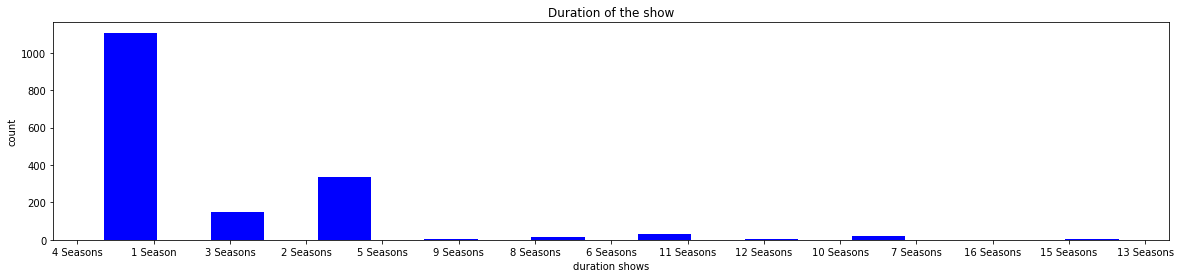

In [36]:
plt.figure(figsize=(20,4))
plt.hist(x=show_df['duration'] , color='b', rwidth=0.5, linewidth=0.2)
plt.title('Duration of the show')
plt.xlabel('duration shows')
plt.ylabel('count')
plt.show() #dibujamos el histogram


In [37]:
# Paises con mas series y peliculas dentro del dataset
movie_df['duration'].value_counts()

90 min     104
91 min     103
92 min     100
93 min      97
94 min      97
          ... 
195 min      1
10 min       1
167 min      1
209 min      1
186 min      1
Name: duration, Length: 187, dtype: int64

# Split data train | test | validation

In [38]:
# DIVISION DATA
X_train, X_val, X_test = np.split(data.sample(frac=1, random_state=93),[int(.6*len(data)), int(.8*len(data))])

In [39]:
print("Train:",X_train.shape, "Test:",X_test.shape, "Validation:",X_val.shape)

Train: (3406, 18) Test: (1136, 18) Validation: (1136, 18)


In [40]:
data_t = X_train.copy()

# Encoding Data

In [41]:
#library are import
import nltk, re
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [42]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jonat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [43]:
#function to remove special characters, tolower todo en minusculas, stemming, and remove double space 
def preprocess(data_input,column_name,language="english",tolower=True, html_tags=True, stemming = False,stop_words=False):
    
    stemmer_preprocces = SnowballStemmer(language=language)
    stop=set(stopwords.words(language))
      
    #remove special characters
    temp = data_input[column_name].copy()

    temp = temp.apply(lambda x: re.sub("[^A-Za-z0-9-\s]+","",str(x)))
      
    #clean HTML tags
    if html_tags: temp = temp.apply( lambda x: re.sub(re.compile('<.*?>'), '', x) )
      
    #tolower todo en minusculas
    if tolower: temp =temp.apply(lambda x: str(x).lower()) 
   
     #stemming
    if stemming: temp = temp.apply( lambda x: ' '.join([stemmer_preprocces.stem(x_i) for x_i in x.split(' ')]) )
    
    #remove stopwords
    if stop_words: temp = temp.apply( lambda x: ' '.join([y for y in x.split(' ') if y not in stop]) )
              
    #remove double space
    result = temp.apply(lambda x: re.sub("\s\s+" , " ", x))#remove espacios dobles y deja solo un espacio
        
    return result

### Encode title shows and movies 

In [44]:
#Vectorizacion de titulos de peliculas
corpus_preprocessed = preprocess(data_t,'originalTitle',language="english",tolower=True, html_tags=True, stemming = True,stop_words=True)

vectorizer_features = TfidfVectorizer(norm="l2", analyzer='word', ngram_range=(1,2), max_features = 200)
tf_idf_features = vectorizer_features.fit_transform(corpus_preprocessed)

# dimension de titulos de peliculos luego de la vectorizacion
print(tf_idf_features.shape)

# get the first vector out (for the first document) 
first_vector_tfidfvectorizer=tf_idf_features 
 
# se convierten los vectores como dataframe 
vector_title= pd.DataFrame(first_vector_tfidfvectorizer.todense())

# se a;ade un prefijo a las columnas de titulo de peliculas y series
vector_title = vector_title.add_prefix('title_')
vector_title[0:5]

(3406, 200)


title_0  title_1  title_2  title_3  title_4  title_5  title_6  title_7  \
0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
4      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

   title_8  title_9  ...  title_190  title_191  title_192  title_193  \
0      0.0      0.0  ...        0.0        0.0        0.0        0.0   
1      0.0      0.0  ...        0.0        0.0        0.0        0.0   
2      0.0      0.0  ...        0.0        0.0        0.0        0.0   
3      0.0      0.0  ...        0.0        0.0        0.0        0.0   
4      0.0      0.0  ...        0.0        0.0        0.0        0.0   

   title_194  title_195  title_196  title_197  title_198  title_199  
0        0.0        0.0        0.0        0.0        0.0        0.0  
1        0.0        0.0        0.0        0.0        0.0        0.0  
2        0.0        0.0        0.0        0.0        0.0        0.0  
3        0.0        0.0        0.0        0.0        0.0        0.0  
4        0.0        0.0        0.0        0.0        0.0        0.0  

[5 rows x 200 columns]

### Encode Description

se lleva a cabo vectorizacion de la columna de 'description' con 500 caracteristicas, se realiza la etapa de preprocesamiento, se retiran stopwords y se crea una matriz luego de la vectorizacion

In [45]:
description_preprocessed = preprocess(data_t,'description',language="english",tolower=True, html_tags=True, stemming = True,stop_words=True)

vectorizer_desc = TfidfVectorizer(norm="l2", analyzer='word', ngram_range=(1,2), max_features = 500)
tf_idf_desc = vectorizer_desc.fit_transform(description_preprocessed)
print(tf_idf_desc.shape)

# get the first vector out (for the first document) 
first_vector_tfidfvectorizerDesc=tf_idf_desc
 
# place tf-idf values in a pandas data frame 
vector_description= pd.DataFrame(first_vector_tfidfvectorizerDesc.todense())

vector_description = vector_description.add_prefix('desc_')
vector_description

(3406, 500)


desc_0    desc_1  desc_2  desc_3  desc_4    desc_5  desc_6  desc_7  \
0        0.0  0.000000     0.0     0.0     0.0  0.000000     0.0     0.0   
1        0.0  0.000000     0.0     0.0     0.0  0.000000     0.0     0.0   
2        0.0  0.470572     0.0     0.0     0.0  0.000000     0.0     0.0   
3        0.0  0.000000     0.0     0.0     0.0  0.364293     0.0     0.0   
4        0.0  0.000000     0.0     0.0     0.0  0.000000     0.0     0.0   
...      ...       ...     ...     ...     ...       ...     ...     ...   
3401     0.0  0.000000     0.0     0.0     0.0  0.000000     0.0     0.0   
3402     0.0  0.000000     0.0     0.0     0.0  0.000000     0.0     0.0   
3403     0.0  0.000000     0.0     0.0     0.0  0.000000     0.0     0.0   
3404     0.0  0.000000     0.0     0.0     0.0  0.303650     0.0     0.0   
3405     0.0  0.000000     0.0     0.0     0.0  0.000000     0.0     0.0   

      desc_8  desc_9  ...  desc_490  desc_491  desc_492  desc_493  desc_494  \
0        0.0     0.0  ...       0.0  0.000000       0.0       0.0  0.000000   
1        0.0     0.0  ...       0.0  0.000000       0.0       0.0  0.000000   
2        0.0     0.0  ...       0.0  0.000000       0.0       0.0  0.000000   
3        0.0     0.0  ...       0.0  0.000000       0.0       0.0  0.000000   
4        0.0     0.0  ...       0.0  0.000000       0.0       0.0  0.000000   
...      ...     ...  ...       ...       ...       ...       ...       ...   
3401     0.0     0.0  ...       0.0  0.248595       0.0       0.0  0.000000   
3402     0.0     0.0  ...       0.0  0.000000       0.0       0.0  0.000000   
3403     0.0     0.0  ...       0.0  0.000000       0.0       0.0  0.000000   
3404     0.0     0.0  ...       0.0  0.000000       0.0       0.0  0.245388   
3405     0.0     0.0  ...       0.0  0.000000       0.0       0.0  0.000000   

      desc_495  desc_496  desc_497  desc_498  desc_499  
0          0.0       0.0  0.000000       0.0       0.0  
1          0.0       0.0  0.000000       0.0       0.0  
2          0.0       0.0  0.274695       0.0       0.0  
3          0.0       0.0  0.260148       0.0       0.0  
4          0.0       0.0  0.000000       0.0       0.0  
...        ...       ...       ...       ...       ...  
3401       0.0       0.0  0.000000       0.0       0.0  
3402       0.0       0.0  0.213528       0.0       0.0  
3403       0.0       0.0  0.000000       0.0       0.0  
3404       0.0       0.0  0.000000       0.0       0.0  
3405       0.0       0.0  0.000000       0.0       0.0  

[3406 rows x 500 columns]

## Encoding Dummies

In [46]:
# dfcas refiere a dataframe cast
dfcas = X_train.copy()

#### Transform genre to dummy

In [47]:
#se extrae la columna genres
genero = dfcas['genres']

# se dividen los generos contenidos en una sola columna para trabajarlos por separado
genero = dfcas["genres"].str.split(',',expand=True)

#conteo de valores de genero 
genero.value_counts()

0          1            2        
Action     Adventure    Animation    70
Comedy     Drama        Romance      64
Adventure  Animation    Comedy       58
Action     Crime        Drama        57
Crime      Drama        Thriller     41
                                     ..
           Documentary  Music         1
Comedy     Romance      Sport         1
                        Sci-Fi        1
Adventure  Family       Sci-Fi        1
Short      Thriller     Western       1
Length: 273, dtype: int64

In [48]:
#se transforman en variables dummy con el prefijo genre
dummy_genre = pd.get_dummies(genero, prefix='genre')
# verificacion de data luego de volverlas dummy
dummy_genre[1:3]

genre_Action  genre_Adult  genre_Adventure  genre_Animation  \
7845             0            0                0                0   
3985             1            0                0                0   

      genre_Biography  genre_Comedy  genre_Crime  genre_Documentary  \
7845                0             0            0                  0   
3985                0             0            0                  0   

      genre_Drama  genre_Family  ...  genre_News  genre_Reality-TV  \
7845            1             0  ...           0                 0   
3985            0             0  ...           0                 0   

      genre_Romance  genre_Sci-Fi  genre_Short  genre_Sport  genre_Talk-Show  \
7845              0             0            0            0                0   
3985              0             0            0            0                0   

      genre_Thriller  genre_War  genre_Western  
7845               0          0              0  
3985               0          0              0  

[2 rows x 75 columns]

#### Cleaning of special characters in names

In [49]:
#se convierte la variable cast la cual refiere a el casting, en minusculas
dfcas['cast'] = dfcas['cast'].apply(lambda x: str(x).lower())

#se reemplazan caracteres especiales
dfcas['cast'] = dfcas['cast'].apply(lambda x: x.translate(x.maketrans("ãáàäéèëíìïòóöøùúüÀÁÄÈÉËÌÍÏÒÓÖÙÚÜşç", "aaaaeeeiiioooouuuAAAEEEIIIOOOUUUsc")))#x o str

In [50]:
#se reemplazan caracteres especiales
dfcas['cast'] = dfcas['cast'].apply(lambda x: x.translate(x.maketrans("ãáàäéèëíìïòóöøùúüÀÁÄÈÉËÌÍÏÒÓÖÙÚÜşç", "aaaaeeeiiioooouuuAAAEEEIIIOOOUUUsc")))#x o str

In [51]:
# verificacion de los reemplazos de letras especiales
dfcas.head(2)

show_id     type                                               cast  \
17189   s6706    Movie  pat morita, hilary swank, michael ironside, co...   
7845    s3148  TV Show  angelica celaya, gabriel porras, rosalinda rod...   

             country           date_added  release_year rating  duration  \
17189  United States  2020-11-01 00:00:00          1994     PG   107 min   
7845   United States  2021-01-01 00:00:00          2017  TV-MA  1 Season   

                                             description  \
17189  In Boston, karate master Mr. Miyagi finds a ne...   
7845   This drama follows Mexican-American singer Jen...   

                          originalTitle isAdult          genres  \
17189               The Next Karate Kid       0  Comedy,Fantasy   
7845   Jenni Rivera: Mariposa de Barrio       0   Drama,Musical   

       averageRating  numVotes  year_added  month_added  day_added target_ages  
17189            7.2        69      2020.0         11.0        1.0  Older Kids  
7845             6.9       168      2021.0          1.0        1.0      Adults

Inicialmente se obtendran variables dummies y al final se uniran todas en un sola matriz

#### Transform column 'cast' to dummy

In [52]:
# se extrae la columna cast 
casting = dfcas['cast']
#Se separa contenido por columnas
casting_sep =casting.str.split(',',expand=True)
casting_sep[1:3]

#lista de valores unicos en una de las columnas
lista_cat = casting_sep[0].unique().tolist()
print(len(lista_cat))

# se convierte en variable dummy la columna 'cast'
dummy_cast= pd.get_dummies(casting_sep, prefix='cast_')
dummy_cast[0:2]

#se llenan valores vacios debido a que el contenido en cada una de las filas difiere
dummy_cast=dummy_cast.fillna(0)

2466


#### Transform column 'country' to dummy

In [53]:
#se convierte en variables dummy los paises ya que el tama;o en cada fila es distinto, 
#por que las producciones se realizan en distintos paises
countries = dfcas['country']
# se separan paises y se convierten columnas
countries_sep =countries.str.split(',',expand=True)
lista_countries = countries_sep[0].unique().tolist()
print(len(lista_countries))

dummy_countries= pd.get_dummies(countries_sep, prefix='cast_')
dummy_countries[0:2]

69


cast__Argentina  cast__Australia  cast__Austria  cast__Bangladesh  \
17189                0                0              0                 0   
7845                 0                0              0                 0   

       cast__Belarus  cast__Belgium  cast__Brazil  cast__Bulgaria  \
17189              0              0             0               0   
7845               0              0             0               0   

       cast__Cambodia  cast__Canada  ...  cast__ Singapore  \
17189               0             0  ...                 0   
7845                0             0  ...                 0   

       cast__ United Kingdom  cast__ United States  cast__ France  \
17189                      0                     0              0   
7845                       0                     0              0   

       cast__ Germany  cast__ United Kingdom  cast__ United States  \
17189               0                      0                     0   
7845                0                      0                     0   

       cast__ United States  cast__ Germany  cast__ Netherlands  
17189                     0               0                   0  
7845                      0               0                   0  

[2 rows x 229 columns]

#### Transform column 'target ages' to dummy


In [54]:
# se repiten pasos anteriores 
ages = dfcas['target_ages']

ages_sep =ages.str.split(',',expand=True)

lista_ages = ages_sep[0].unique().tolist()
len(lista_ages)

dummy_ages= pd.get_dummies(ages_sep, prefix='cast_')
dummy_ages[0:2]

cast__Adults  cast__Kids  cast__Older Kids  cast__Teens
17189             0           0                 1            0
7845              1           0                 0            0

# Encoding numerical data

Se agruparan solamente variables de tipo numerico

In [55]:
#variables numericas
sample_num = dfcas[['isAdult','averageRating','numVotes']]
print(sample_num.dtypes)
sample_num.head(2)

isAdult           object
averageRating    float64
numVotes           int64
dtype: object


isAdult  averageRating  numVotes
17189       0            7.2        69
7845        0            6.9       168

### Normalize minmax Scaler numerical variables

In [56]:
from sklearn.preprocessing import MinMaxScaler
# define min max scaler
scaler = MinMaxScaler()

# transform data
scaled = scaler.fit_transform(sample_num)
print(scaled)

num_scaled = pd.DataFrame(scaled)

num_df = num_scaled.rename(columns={0: "isAdult", 1: "averageRating", 2: "numVotes"})

[[0.00000000e+00 6.88888889e-01 4.69407468e-05]
 [0.00000000e+00 6.55555556e-01 1.19552215e-04]
 [0.00000000e+00 6.11111111e-01 8.80139003e-06]
 ...
 [0.00000000e+00 7.88888889e-01 6.08762811e-04]
 [0.00000000e+00 6.66666667e-01 7.33449169e-07]
 [0.00000000e+00 7.66666667e-01 1.32020850e-05]]


In [57]:
#Group numerical data(4th Dataset
num_df.head()

isAdult  averageRating  numVotes
0      0.0       0.688889  0.000047
1      0.0       0.655556  0.000120
2      0.0       0.611111  0.000009
3      0.0       0.588889  0.000108
4      0.0       0.644444  0.000164

# Grouping by data type

Grouping data NPL (1st Dataset)

In [58]:
#se agrupa la matriz de titulos de series y peliculas con la matriz de descripcion
# se deja una sola matriz para el posterior paso de PCA
df_vector_npl = pd.concat([vector_description,vector_title],axis=1)
df_vector_npl.head()

desc_0    desc_1  desc_2  desc_3  desc_4    desc_5  desc_6  desc_7  desc_8  \
0     0.0  0.000000     0.0     0.0     0.0  0.000000     0.0     0.0     0.0   
1     0.0  0.000000     0.0     0.0     0.0  0.000000     0.0     0.0     0.0   
2     0.0  0.470572     0.0     0.0     0.0  0.000000     0.0     0.0     0.0   
3     0.0  0.000000     0.0     0.0     0.0  0.364293     0.0     0.0     0.0   
4     0.0  0.000000     0.0     0.0     0.0  0.000000     0.0     0.0     0.0   

   desc_9  ...  title_190  title_191  title_192  title_193  title_194  \
0     0.0  ...        0.0        0.0        0.0        0.0        0.0   
1     0.0  ...        0.0        0.0        0.0        0.0        0.0   
2     0.0  ...        0.0        0.0        0.0        0.0        0.0   
3     0.0  ...        0.0        0.0        0.0        0.0        0.0   
4     0.0  ...        0.0        0.0        0.0        0.0        0.0   

   title_195  title_196  title_197  title_198  title_199  
0        0.0        0.0        0.0        0.0        0.0  
1        0.0        0.0        0.0        0.0        0.0  
2        0.0        0.0        0.0        0.0        0.0  
3        0.0        0.0        0.0        0.0        0.0  
4        0.0        0.0        0.0        0.0        0.0  

[5 rows x 700 columns]

Grouping categorical data (2nd Dataset)

In [59]:
#convertir de int a string
dfcas[['year_added','month_added','release_year']] = dfcas[['year_added','month_added','release_year']].astype('string')
# agrupacion de variables cateegoricas 
data_catego = dfcas[['type','year_added','month_added','release_year']]

d1 =data_catego.loc[:, ('year_added')].astype("category")
d2=data_catego.loc[:, ('month_added')].astype("category")
d3=data_catego.loc[:, ('release_year')].astype("category")
d4=data_catego['type']

cat_df = pd.concat([d1,d2,d3,d4],axis=1)
cat_df.head()

year_added month_added release_year     type
17189     2020.0        11.0         1994    Movie
7845      2021.0         1.0         2017  TV Show
3985      2017.0        11.0         2017    Movie
6678      2020.0         9.0         2020  TV Show
16069     2020.0         4.0         2020  TV Show

Grouping Data Dummies (3rd Dataset)

In [60]:
#Group Data Dummies (3rd Dataset)

df_dummy = pd.concat([dummy_cast,dummy_countries,dummy_genre,dummy_ages],axis=1)
df_dummy.head()

cast__0  cast__4minute  cast__50 cent  cast__a.r. rahman  cast__aadhi  \
17189        0              0              0                  0            0   
7845         0              0              0                  0            0   
3985         0              0              0                  0            0   
6678         0              0              0                  0            0   
16069        0              0              0                  0            0   

       cast__aamir khan  cast__aaron eckhart  cast__aaron hernandez  \
17189                 0                    0                      0   
7845                  0                    0                      0   
3985                  0                    0                      0   
6678                  0                    0                      0   
16069                 0                    0                      0   

       cast__aaron paul  cast__aaron pedersen  ...  genre_Short  genre_Sport  \
17189                 0                     0  ...            0            0   
7845                  0                     0  ...            0            0   
3985                  0                     0  ...            0            0   
6678                  0                     0  ...            0            0   
16069                 0                     0  ...            0            0   

       genre_Talk-Show  genre_Thriller  genre_War  genre_Western  \
17189                0               0          0              0   
7845                 0               0          0              0   
3985                 0               0          0              0   
6678                 0               0          0              0   
16069                0               0          0              0   

       cast__Adults  cast__Kids  cast__Older Kids  cast__Teens  
17189             0           0                 1            0  
7845              1           0                 0            0  
3985              0           0                 1            0  
6678              0           0                 1            0  
16069             1           0                 0            0  

[5 rows x 22976 columns]

Grouping numerical data(4th Dataset)

In [61]:
num_df.head()

isAdult  averageRating  numVotes
0      0.0       0.688889  0.000047
1      0.0       0.655556  0.000120
2      0.0       0.611111  0.000009
3      0.0       0.588889  0.000108
4      0.0       0.644444  0.000164

## Functions to be used for results optimization

In [62]:
#hallar el numero de componentes principales 
def value_PCA(data,porcentaje_varianza):
    from sklearn.decomposition import PCA
     
    pca = PCA()
    pca_x=pca.fit(data)
    cumsum = np.cumsum(pca_x.explained_variance_ratio_)
    d = np.argmax(cumsum >= porcentaje_varianza ) + 1 # decimales de num_var_explain
    print("Numero de componentes=", d)
    
    #Visualizacion del valor optimo del numero de componentes
    plt.figure(figsize=(6,4))
    plt.plot(cumsum, linewidth=3)
    plt.xlabel("Dimensions")
    plt.ylabel("Explained Variance")
    plt.plot([d, d], [0, 0.95], "k:")
    plt.plot([0, d], [0.95, 0.95], "k:")
    plt.plot(d, 0.95, "ko")
    plt.title('Identificacion de valor optimo del numero de componentes')
    plt.grid(True)
    plt.show()
    
    

In [63]:
# Visualizacion del valor mas optimo de K de K-means
def best_k (start_k,stop_k,step_k,data_in,num_inicia,max_iteracion):
    
    from sklearn.cluster import KMeans
    
    rango = range(start_k,stop_k,step_k)
    rango2 = range(2,stop_k,step_k)
        
    kmeans_kwargs = {  
          "init": "random",
          "n_init": num_inicia,
          "max_iter": max_iteracion,
          "random_state": 42,
          }
      
    # A list holds the SSE values for each k
    sse = []
    
    for k in rango:
        kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
        kmeans.fit(data_in)
        sse.append(kmeans.inertia_)
    
    #localizacion del valor optimo del cluster
    from kneed import KneeLocator
    kl = KneeLocator(rango, sse, curve="convex", direction="decreasing")
    print('convex K',kl.elbow)
    
    # A list holds the silhouette coefficients for each k
    from sklearn.metrics import silhouette_score
    silhouette_coefficients = []
    
    # Notice you start at 2 clusters for silhouette coefficient
    for k in rango2:
        kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
        kmeans.fit(data_in)
        score = silhouette_score(data_in, kmeans.labels_)
        silhouette_coefficients.append(score) 
    
    #visualization     
    fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(18, 4), sharex=False, sharey=False)
    
    fig.suptitle(f"Elbow and Silhouette", fontsize=12)
    
    ax1.plot(rango, sse)
    ax1.set_xticks(rango, minor=False)
    ax1.set_title(f"Elbow Method", fontdict={"fontsize": 12})
    
    ax2.plot(rango2, silhouette_coefficients)
    ax2.set_xticks(rango2)
    ax2.set_title(f'Silhouette Coefficients',fontdict={"fontsize":12})

In [64]:
#Visualizacion de los coeficiente de silueta
def coef_silueta(data_input,rango_final,num_subx,num_suby):

    X = data_input
    rango=rango_final
    
    from sklearn.metrics import silhouette_samples
    from matplotlib.ticker import FixedLocator, FixedFormatter

    
    kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                    for k in range(1, rango_final)]
    inertias = [model.inertia_ for model in kmeans_per_k]
    
    silhouette_scores = [silhouette_score(X, model.labels_)
                         for model in kmeans_per_k[1:]]
    
    
    plt.figure(figsize=(11, 15))
         
    num_silue = range(3,rango_final)
        
    for k in num_silue:
        plt.subplot(num_subx, num_suby, k - 2)
        
        y_pred = kmeans_per_k[k - 1].labels_
        silhouette_coefficients = silhouette_samples(X, y_pred)
    
        padding = len(X) // 30
        pos = padding
        ticks = []
        for i in range(k):
            coeffs = silhouette_coefficients[y_pred == i]
            coeffs.sort()
            
    
            color = plt.cm.Spectral(i / k)
            plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                              facecolor=color, edgecolor=color, alpha=0.7)
            ticks.append(pos + len(coeffs) // 2)
            pos += len(coeffs) + padding
    
        plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
        plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
        if k in (3, 5):
            plt.ylabel("Cluster")
        
        if k in (5, 6):
            plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
            #plt.xlabel("Silhouette Coefficient")
        else:
            plt.tick_params(labelbottom=False)
    
        plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
        plt.title("$k={}$".format(k), fontsize=16)
            
    plt.show()

In [65]:
#promedio de los coeficientes de silueta
def avg_silhouette(data_input,max_k,step_k):

    from sklearn.metrics import silhouette_samples
    X=data_input
    #max_k = 9 ## maximo número de clusters que vamos a crear
    K = range(1,max_k,step_k)
    
    for k in K:
        kmeanModel = KMeans(n_clusters=k).fit(X)
        
        centers = pd.DataFrame(kmeanModel.cluster_centers_)
        labels = kmeanModel.labels_
        
        if 1<k<len(X):
                 
            silhouette_avg = silhouette_score(X, labels)
            print("* Para k = ",k, " el promedio de la silueta es de :",silhouette_avg)
            sample_silhouette_values = silhouette_samples(X, labels)

In [66]:
# KNN para hallar un valor aproximado para el mejor eps
def best_epsilon(data_input,num_neigh):
    
    from sklearn.neighbors import NearestNeighbors
    
    X=data_input
    
    neigh = NearestNeighbors(n_neighbors=num_neigh)#75
    nbrs = neigh.fit(X)
    distancias , indices = nbrs.kneighbors(X)
    
    #grafica para el mejor Epsilon
    distancias = np.sort(distancias, axis = 0)#ordena
    distancias = distancias[:,num_neigh -1]#me quedo con la ultima columna, la que tiene la mayor distancias
    
    fig = plt.figure(figsize=(7,7))
    plt.plot(distancias)
    plt.xlabel("puntos")
    plt.ylabel("distancia")

# Dimension reduction datasets 1 to 4

# PCA 1 | Variables numericas

In [67]:
from sklearn.decomposition import PCA

numerical dataset (3406, 3)
Numero de componentes= 2


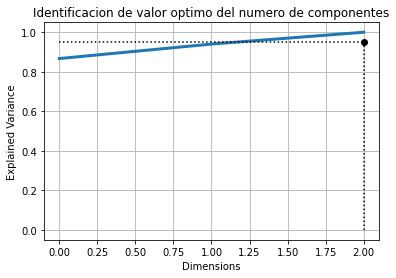

In [68]:
print('numerical dataset',num_df.shape)

value_PCA(num_df,0.92)

#PCA de variables numericas
pca2 = PCA(n_components=2)
X_reduced = pca2.fit_transform(num_df)

X_pca = pd.DataFrame(X_reduced)# se convierte a dataframe

#print("% varianza explicada:",np.sum(pca2.explained_variance_ratio_))

# PCA 2 | NPL dataset

NPL dataset (3406, 700)
Numero de componentes= 530


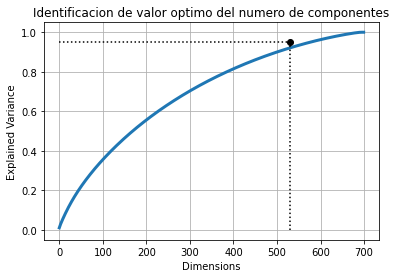

In [69]:
print('NPL dataset',df_vector_npl.shape)

value_PCA(df_vector_npl,0.92)

In [70]:
# se realiza PCA definiendo el numero de componente previamente identificado
pca_npl= PCA(n_components=530)
npl_reduced = pca_npl.fit_transform(df_vector_npl)

# PCA 3 | Dummy Dataset

dataset dummy (3406, 22976)
Numero de componentes= 2193


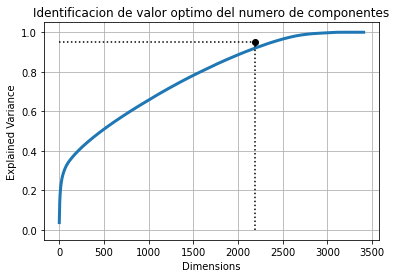

In [71]:
print('dataset dummy',df_dummy.shape)

value_PCA(df_dummy,0.92)

In [72]:
pca_dummy= PCA(n_components=2193)
dummy_reduced = pca_dummy.fit_transform(df_dummy)#df_dummy, data final para analizar
np.sum(pca_dummy.explained_variance_ratio_)

0.9154066950294362

# MCA 4 | Categorical data

In [73]:
import prince
mca = prince.MCA(
    n_components=3,
    n_iter=5,
    copy=True,
    check_input=True,
    engine='auto',
    random_state=42
    )

In [74]:
mca = mca.fit(cat_df)

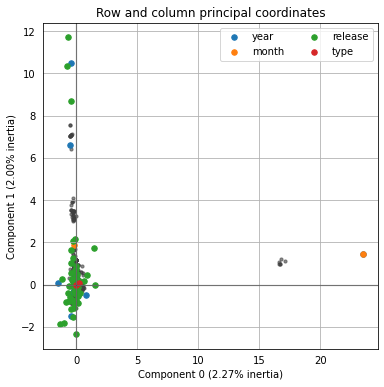

In [75]:
ax = mca.plot_coordinates(
     X=cat_df,
     ax=None,
     figsize=(6, 6),
     show_row_points=True,
     row_points_size=10,
     show_row_labels=False,
     show_column_points=True,
     column_points_size=30,
     show_column_labels=False,
     legend_n_cols=2
     )

In [76]:
mca = mca.fit_transform(cat_df)

In [77]:
mca

0         1         2
17189 -0.028325  0.137751 -0.129775
7845  -0.194154  3.108057  1.029751
3985  -0.038205 -0.295068  0.675383
6678   0.020246  0.408950 -1.743630
16069  0.028839  0.449583 -1.528912
...         ...       ...       ...
902   -0.038892 -0.048721 -0.168019
13504  0.038851 -0.352749  0.357315
4261  -0.633650  0.317062  0.485808
7127   0.060492 -0.250090  0.205322
14999  0.057004 -0.099312 -0.144394

[3406 rows x 3 columns]

# Models

### Parameters | Numerical dataset

convex K 7


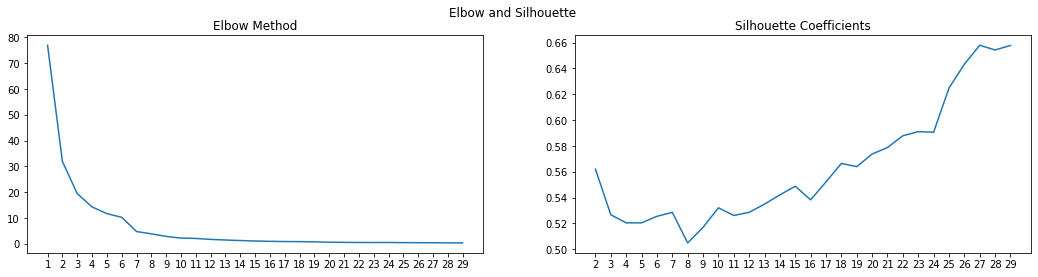

In [78]:
best_k(1,30,1,X_reduced,10,100)

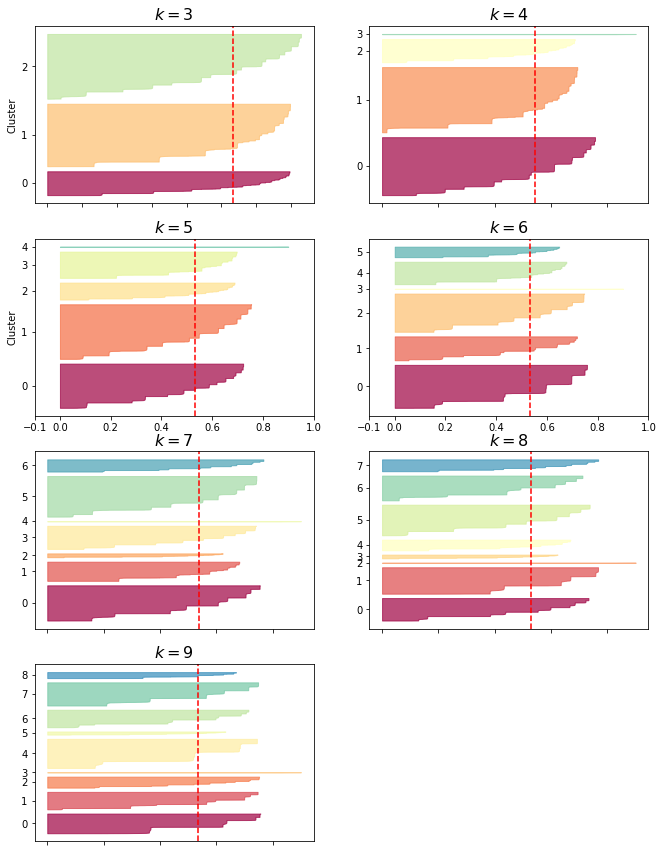

In [79]:
coef_silueta(X_reduced,10,4,2)

In [80]:
avg_silhouette(X_reduced,20,2)

* Para k =  3  el promedio de la silueta es de : 0.5342824615608452
* Para k =  5  el promedio de la silueta es de : 0.5268443831725962
* Para k =  7  el promedio de la silueta es de : 0.5374605576387885
* Para k =  9  el promedio de la silueta es de : 0.5343443239174771
* Para k =  11  el promedio de la silueta es de : 0.5276591827273757
* Para k =  13  el promedio de la silueta es de : 0.5336011160536839
* Para k =  15  el promedio de la silueta es de : 0.5473803797459422
* Para k =  17  el promedio de la silueta es de : 0.546559884504541
* Para k =  19  el promedio de la silueta es de : 0.5738438378545756


### Modelos

### DBSCAN

In [81]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.9)
dbscan.fit(X_reduced)
print(dbscan.labels_[:10])
dbscan_silhouette = silhouette_score(X_reduced, dbscan.labels_).round (2)

[0 0 0 0 0 0 0 0 0 0]


### K-Means

In [82]:
kmeansn = KMeans(n_clusters=7, random_state=0)#39 # se definen parametros 
kmeansn.fit(X_reduced)
kmeans_silhouette = silhouette_score(X_reduced, kmeansn.labels_).round(2)

### Minibatch Kmeans

In [83]:
from sklearn.cluster import MiniBatchKMeans
# Create k-mean object
cluster_mb_km= MiniBatchKMeans(n_clusters=7, random_state=0, batch_size=100)

# Train model
model_mini_k = cluster_mb_km.fit(X_reduced)

#verificacion centroides
print(model_mini_k.labels_)

kmeansm_silhouette = silhouette_score(X_reduced, model_mini_k.labels_).round(2)

C:\Users\jonat\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:888: UserWarning:

MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1



[1 3 3 ... 5 1 5]


In [84]:
print('Coeficientes de silueta','K-means:', kmeans_silhouette ,'DBSCAN:', dbscan_silhouette, 'Minibatch K-means',kmeansm_silhouette,sep='\n')

Coeficientes de silueta
K-means:
0.54
DBSCAN:
0.84
Minibatch K-means
0.52


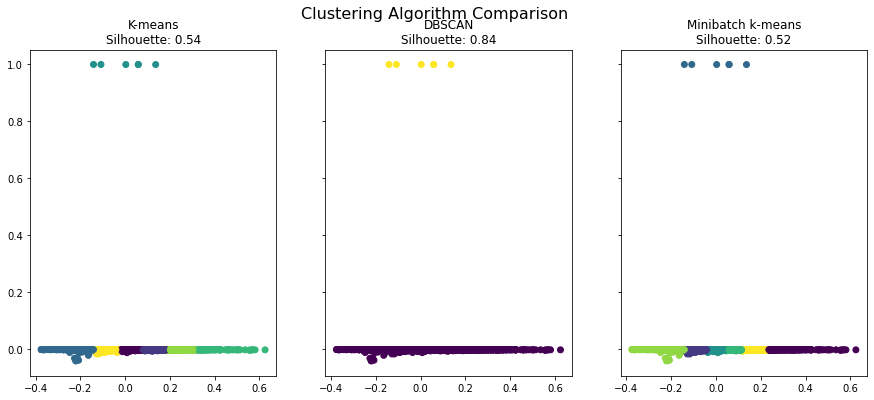

In [85]:
fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(15, 6), sharex=True, sharey=True)

fig.suptitle(f"Clustering Algorithm Comparison", fontsize=16)

#Vectores a los que se asignado cada observacion
label_kmeans_num = kmeansn.labels_ 
label_dbscan_num= dbscan.labels_
labels_minibatch_num= model_mini_k.labels_

# The k-means plot
ax1.scatter(X_reduced[:, 0], X_reduced[:, 1], c=label_kmeans_num)
ax1.set_title(f"K-means\nSilhouette: {kmeans_silhouette}", fontdict={"fontsize": 12})

# The dbscan plot
ax2.scatter(X_reduced[:, 0], X_reduced[:, 1], c=label_dbscan_num)
ax2.set_title(f"DBSCAN\nSilhouette: {dbscan_silhouette}", fontdict={"fontsize": 12})

#Minibatch
ax3.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels_minibatch_num)
ax3.set_title(f"Minibatch k-means\nSilhouette: {kmeansm_silhouette}", fontdict={"fontsize": 12})
plt.show()

In [86]:
# se transforman como una lista
cluster_k_num = pd.Series(kmeansn.labels_)
cluster_db_num = pd.Series(dbscan.labels_)
cluster_km_num = pd.Series(model_mini_k.labels_)

In [87]:
#se unen al dataset de variables numericas
num_df["clust_kmeans"] = cluster_k_num 
num_df["clust_dbscan"] = cluster_db_num
num_df["clust_minibatch"] = cluster_km_num

Text(0.5, 1.0, 'Cluster Minibatch')

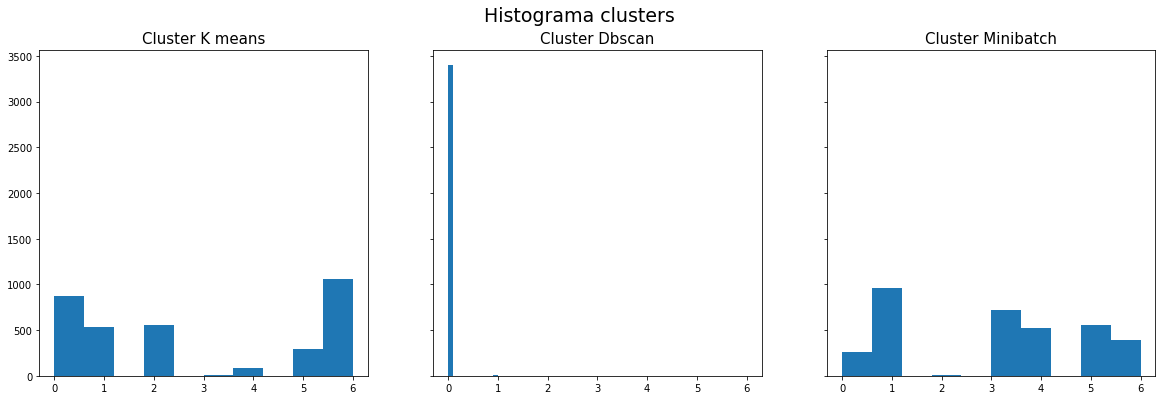

In [88]:
# se realiza histograma para ver la distribucion de los cluster

fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(20, 6), sharex=True, sharey=True)

fig.suptitle(f"Histograma clusters", fontsize=19)

ax1.hist(cluster_k_num)
ax1.set_title("Cluster K means",fontsize=15)

ax2.hist(cluster_db_num)
ax2.set_title("Cluster Dbscan",fontsize=15)

ax3.hist(cluster_km_num)
ax3.set_title("Cluster Minibatch",fontsize=15)

In [89]:
num_df.head()

isAdult  averageRating  numVotes  clust_kmeans  clust_dbscan  \
0      0.0       0.688889  0.000047             6             0   
1      0.0       0.655556  0.000120             6             0   
2      0.0       0.611111  0.000009             0             0   
3      0.0       0.588889  0.000108             0             0   
4      0.0       0.644444  0.000164             0             0   

   clust_minibatch  
0                1  
1                3  
2                3  
3                3  
4                3

# Models | NPL

### Parameters NPL

convex K 181


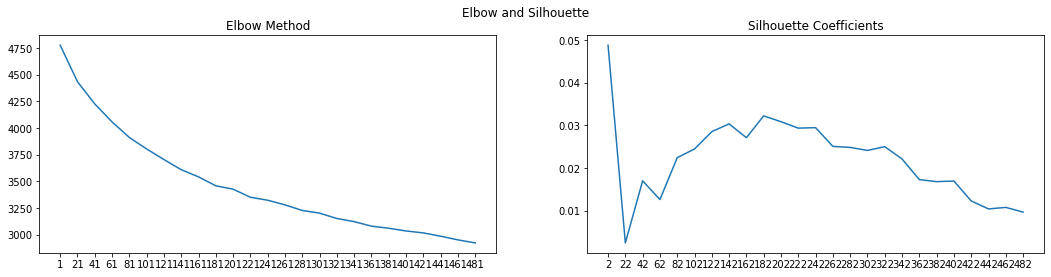

In [90]:
best_k(1,500,20,df_vector_npl,20,150)

In [91]:
avg_silhouette(df_vector_npl,200,20)

* Para k =  21  el promedio de la silueta es de : -0.00030783285318485313
* Para k =  41  el promedio de la silueta es de : 0.01300367545210069
* Para k =  61  el promedio de la silueta es de : 0.014068783022486524
* Para k =  81  el promedio de la silueta es de : 0.02317831320666715
* Para k =  101  el promedio de la silueta es de : 0.02501920940486027
* Para k =  121  el promedio de la silueta es de : 0.02708565422698244
* Para k =  141  el promedio de la silueta es de : 0.035150375128412896
* Para k =  161  el promedio de la silueta es de : 0.03416713798224409
* Para k =  181  el promedio de la silueta es de : 0.036505874950747724


El objeto devuelto por KMeans() contiene entre otros datos: la media de cada una de las variables para cada cluster (cluster_centers_), es decir, los centroides. Un vector indicando a qué cluster se ha asignado cada observación (.labels_) y la suma total de cuadrados internos de todos los clusters (.inertia_).

### Modelos

#### Kmeans = 72

In [92]:
kmeans_npl = KMeans(n_clusters=72,random_state= 42)
kmeans_npl.fit(npl_reduced)
print(kmeans_npl.labels_)
kmeans_silhouette_npl = silhouette_score(npl_reduced, kmeans_npl.labels_)#.round(5)

[ 4 11 64 ... 28 62 57]


#### Kmeans = 191

In [93]:
kmeans_npl_2 = KMeans(n_clusters=190,random_state= 42)
kmeans_npl_2.fit(npl_reduced)

#n vector indicando a qué cluster se ha asignado cada observación (.labels_)
print(kmeans_npl_2.labels_)

#suma total de cuadrados internos de todos los clusters (.inertia_).
print(kmeans_npl_2.inertia_)

kmeans_silhouette_npl_2 = silhouette_score(npl_reduced, kmeans_npl_2.labels_)#.round(5)

[125  94   2 ...  99 106 120]
3020.5613679178764


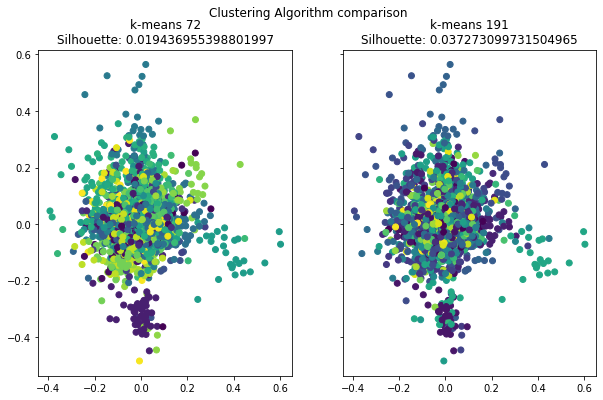

In [94]:
# comparacion de los resultados asignando distintos valores a k 
# basandonos en los resultados de las graficas de inercia y coeficiente de silueta
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(10, 6), sharex=True, sharey=True)

labelsk1 = kmeans_npl.labels_
labelsk2 = kmeans_npl_2.labels_

fig.suptitle(f"Clustering Algorithm comparison", fontsize=12)

# The k-means plot 72
ax1.scatter(npl_reduced[:, 5], npl_reduced[:, 2], c=labelsk1)
ax1.set_title(f"k-means 72\nSilhouette: {kmeans_silhouette_npl}", fontdict={"fontsize": 12})

# The k-means plot 191
ax2.scatter(npl_reduced[:, 5], npl_reduced[:, 2], c=labelsk2)
ax2.set_title(f"k-means 191\nSilhouette: {kmeans_silhouette_npl_2}", fontdict={"fontsize": 12})

plt.show()

### DBSCAN

In [95]:
dbscan_npl = DBSCAN(eps=1.43,min_samples=10)
dbscan_npl.fit(npl_reduced)

dbscan_silhouette_npl = silhouette_score(npl_reduced, dbscan_npl.labels_)

print(dbscan_npl.labels_[:10])
print(np.unique(dbscan_npl.labels_))
print(len(dbscan_npl.core_sample_indices_))
print(dbscan_npl.core_sample_indices_[:3])

[-1  0  0  0  0  0  0  0  0  0]
[-1  0]
2509
[1 2 3]


In [96]:
print('kmeans:', kmeans_silhouette_npl_2 , "DBSCAN",dbscan_silhouette_npl , sep='\n')

kmeans:
0.037273099731504965
DBSCAN
0.09769982449281674


Se visualizan resultados obtenidos con k-means con valor de  k=191 y dbscan

podemos calcular la distancia de cad apunto a sus k-vecinos mas cercanos usando knn
El punto en si mismo esta incluido en n_neighbors. el metodo knn
devuelve dos arrays, uno que contiene la distancia
a los 'n_neighbors' puntos mas cercanos
y el otro que contiene el indice de cada uno de estos puntos


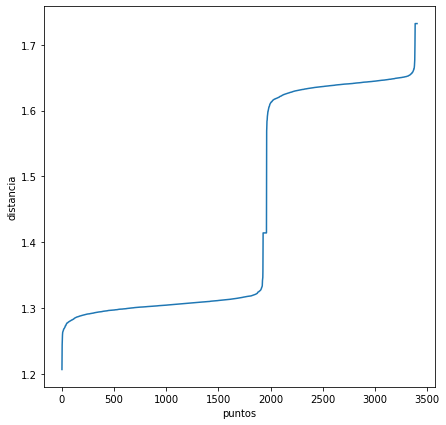

In [97]:
best_epsilon(df_vector_npl,75)

Conforme a la grafica implementada, podemos implementar el modelo de DBSCAN con un epsilon de 1.33, para obtener optimos resultados 

## Minibatch

In [98]:
minib_npl= MiniBatchKMeans(n_clusters=190, random_state=0, batch_size=100)
# Train model
model_minib_npl = minib_npl.fit(npl_reduced)
model_minib_npl.labels_

C:\Users\jonat\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:888: UserWarning:

MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1



array([43, 68, 36, ..., 88, 36, 22])

Text(0.5, 1.0, 'DBSCAN\nSilhouette: 0.09769982449281674')

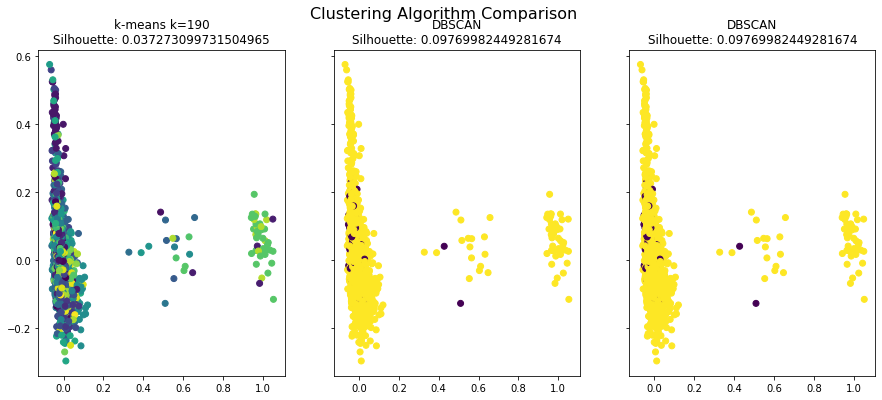

In [99]:
fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(15, 6), sharex=True, sharey=True)

fig.suptitle(f"Clustering Algorithm Comparison", fontsize=16)

labels3 = kmeans_npl_2.labels_
labnpl = dbscan_npl.labels_
lab_mk =model_minib_npl.labels_

# The k-means plot
ax1.scatter(npl_reduced[:, 0], npl_reduced[:, 1], c=labels3)
ax1.set_title(f"k-means k=190\nSilhouette: {kmeans_silhouette_npl_2 }", fontdict={"fontsize": 12})

# The dbscan plot
ax2.scatter(npl_reduced[:, 0], npl_reduced[:, 1], c=labnpl)
ax2.set_title(f"DBSCAN\nSilhouette: {dbscan_silhouette_npl}", fontdict={"fontsize": 12})


ax3.scatter(npl_reduced[:, 0], npl_reduced[:, 1], c=labnpl)
ax3.set_title(f"DBSCAN\nSilhouette: {dbscan_silhouette_npl}", fontdict={"fontsize": 12})


Se concatenan los clusters creados al dataset inicial

In [100]:
# se transforman como una lista
cluster_kmeans_npl = pd.Series(kmeans_npl_2.labels_)
cluster_db_npl = pd.Series(dbscan_npl.labels_)
cluster_minib_npl = pd.Series(model_minib_npl.labels_) 

In [101]:
#se unen al dataset de variables categoricas
df_vector_npl["clust_kmeans_npl"] = cluster_kmeans_npl
df_vector_npl["clust_dbscan_npl"] = cluster_db_npl
df_vector_npl["clust_minibatch_npl"] = cluster_minib_npl

In [102]:
df_vector_npl.head()

desc_0    desc_1  desc_2  desc_3  desc_4    desc_5  desc_6  desc_7  desc_8  \
0     0.0  0.000000     0.0     0.0     0.0  0.000000     0.0     0.0     0.0   
1     0.0  0.000000     0.0     0.0     0.0  0.000000     0.0     0.0     0.0   
2     0.0  0.470572     0.0     0.0     0.0  0.000000     0.0     0.0     0.0   
3     0.0  0.000000     0.0     0.0     0.0  0.364293     0.0     0.0     0.0   
4     0.0  0.000000     0.0     0.0     0.0  0.000000     0.0     0.0     0.0   

   desc_9  ...  title_193  title_194  title_195  title_196  title_197  \
0     0.0  ...        0.0        0.0        0.0        0.0        0.0   
1     0.0  ...        0.0        0.0        0.0        0.0        0.0   
2     0.0  ...        0.0        0.0        0.0        0.0        0.0   
3     0.0  ...        0.0        0.0        0.0        0.0        0.0   
4     0.0  ...        0.0        0.0        0.0        0.0        0.0   

   title_198  title_199  clust_kmeans_npl  clust_dbscan_npl  \
0        0.0        0.0               125                -1   
1        0.0        0.0                94                 0   
2        0.0        0.0                 2                 0   
3        0.0        0.0               173                 0   
4        0.0        0.0               167                 0   

   clust_minibatch_npl  
0                   43  
1                   68  
2                   36  
3                   36  
4                   18  

[5 rows x 703 columns]

# Models | Variables Dummy

Parameters

convex K 3


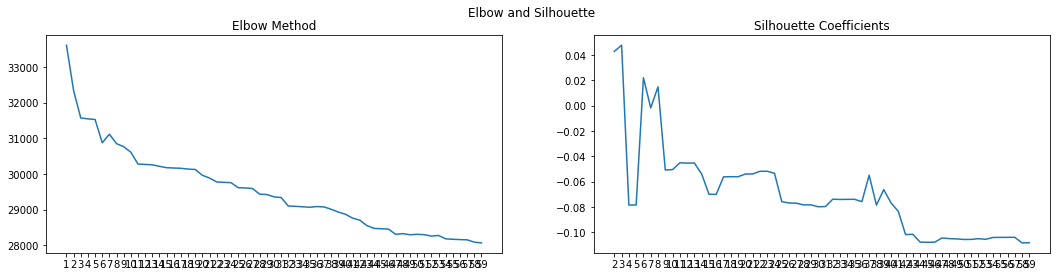

In [103]:
best_k (1,60,1,dummy_reduced,20,100)

con 800 muestras a 10, da 141| con 200 en intervalos de 30, da 61| con 100 en intervalos de 10, da 41| con muestras de 1 a 60, sin intervalos da 4

De acuerdo a la grafica de inercia de opta por usar k=4

In [104]:
avg_silhouette(dummy_reduced,10,1)

* Para k =  2  el promedio de la silueta es de : 0.04145610419837833
* Para k =  3  el promedio de la silueta es de : 0.03136041137104995
* Para k =  4  el promedio de la silueta es de : 0.034932299903793824
* Para k =  5  el promedio de la silueta es de : 0.03617548312797911
* Para k =  6  el promedio de la silueta es de : 0.015721867104802993
* Para k =  7  el promedio de la silueta es de : 0.007399228658733375
* Para k =  8  el promedio de la silueta es de : -0.0710957829544709
* Para k =  9  el promedio de la silueta es de : -0.012480733538731921


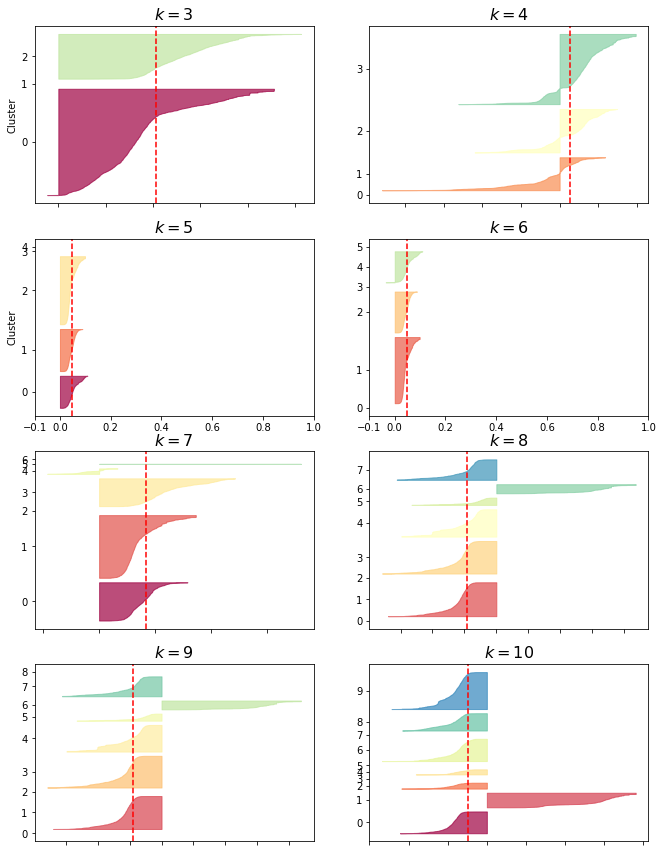

In [105]:
coef_silueta(dummy_reduced,11,4,2)

## K-means

In [106]:
kmeans_dummy = KMeans(n_clusters=4,random_state=93)
kmeans_dummy.fit(dummy_reduced)

kmeans_silhouette_dummy = silhouette_score(dummy_reduced, kmeans_dummy.labels_)

In [107]:
#Se realizo el sistema de recomendacion con este cluster

### DBSCAN DUMMY

In [108]:
dbscan_dummy = DBSCAN(eps=4,min_samples=10)
dbscan_dummy.fit(dummy_reduced)
np.unique(dbscan_dummy.labels_)

dbscan_silhouette_dummy = silhouette_score(dummy_reduced, dbscan_dummy.labels_)
print(dbscan_silhouette_dummy)

0.21949578517795768


#### A continuacion se hara la busqueda de un valor optimo de epsilon mediante KNN

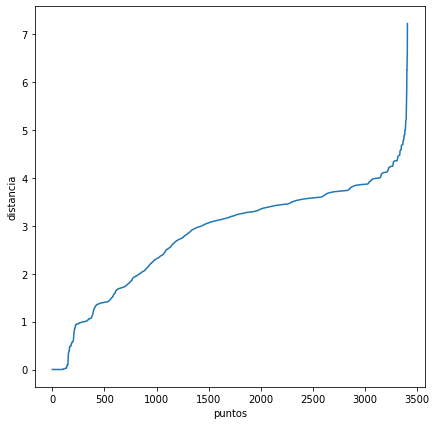

In [109]:
best_epsilon(dummy_reduced,10)

### Minibatch | dummy


In [110]:
# Create k-minibatch
minib_dummy= MiniBatchKMeans(n_clusters=4, random_state=0, batch_size=100)

# Train model
model_mini_dummy= minib_dummy.fit(dummy_reduced)

mini_silhouette_dummy = silhouette_score(dummy_reduced, model_mini_dummy.labels_)
print(mini_silhouette_dummy)

C:\Users\jonat\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:888: UserWarning:

MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1



0.03578094566323479


Text(0.5, 1.0, 'Mn-k-means=4\nSilhouette: 0.03578094566323479')

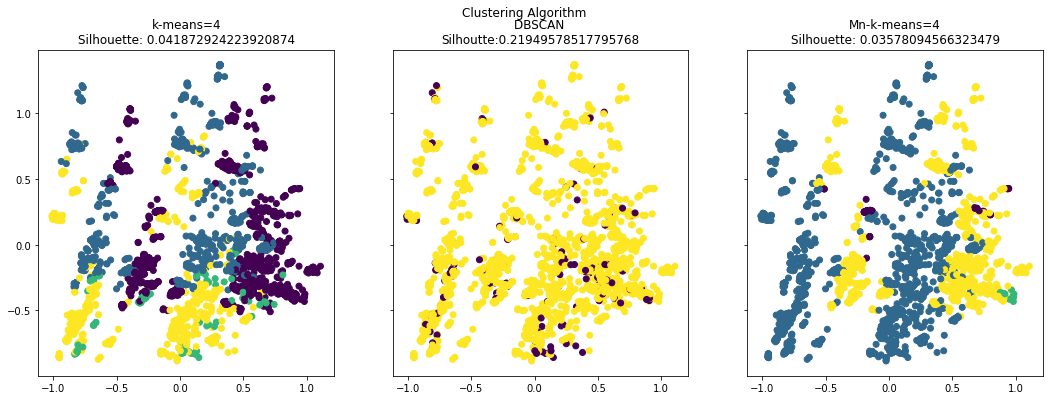

In [111]:
fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(18, 6), sharex=False, sharey=True)

fig.suptitle(f"Clustering Algorithm", fontsize=12)

labelsd = kmeans_dummy.labels_
lab=dbscan_dummy.labels_
lab_du = model_mini_dummy.labels_

# The k-means plot
ax1.scatter(dummy_reduced[:, 1], dummy_reduced[:, 2], c=labelsd)
ax1.set_title(f"k-means=4\nSilhouette: {kmeans_silhouette_dummy}", fontdict={"fontsize": 12})

ax2.scatter(dummy_reduced[:, 1], dummy_reduced[:, 2], c=lab)
ax2.set_title(f'DBSCAN \nSilhoutte:{dbscan_silhouette_dummy}',fontdict={"fontsize":12})

#The Minibatch-kmeans plot
ax3.scatter(dummy_reduced[:, 1], dummy_reduced[:, 2], c=lab_du)
ax3.set_title(f"Mn-k-means=4\nSilhouette: {mini_silhouette_dummy}", fontdict={"fontsize": 12})

In [112]:
# se transforman como una lista
cluster_kmeans_dum = pd.Series(kmeans_dummy.labels_)
cluster_db_dum = pd.Series(dbscan_dummy.labels_)
cluster_k_mini_dum = pd.Series(model_mini_dummy.labels_)

In [113]:
kmeans_dummy.labels_

array([3, 0, 3, ..., 0, 3, 0])

In [114]:
#se unen al datasetlos clusters identificados
df_dummy["clust_kmeans_Du"] = cluster_kmeans_dum
df_dummy["clust_dbscan_Du"] = cluster_db_dum
df_dummy["clust_minibatch_Du"] = cluster_k_mini_dum 

Text(0.5, 1.0, 'Cluster Minibatch')

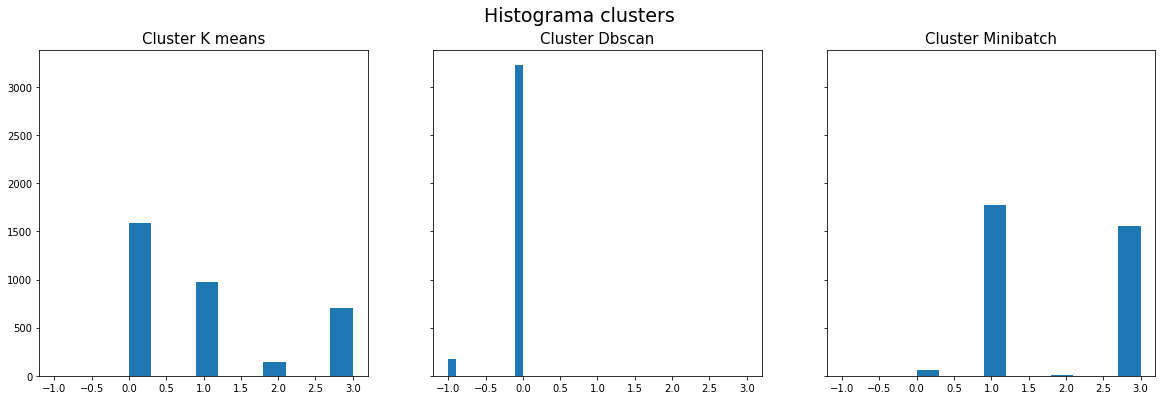

In [115]:
fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(20, 6), sharex=True, sharey=True)

fig.suptitle(f"Histograma clusters", fontsize=19)

# The k-means plot

ax1.hist(cluster_kmeans_dum)
ax1.set_title("Cluster K means",fontsize=15)

ax2.hist(cluster_db_dum)
ax2.set_title("Cluster Dbscan",fontsize=15)

ax3.hist(cluster_k_mini_dum)
ax3.set_title("Cluster Minibatch",fontsize=15)


In [116]:
df_dummy.head()

cast__0  cast__4minute  cast__50 cent  cast__a.r. rahman  cast__aadhi  \
17189        0              0              0                  0            0   
7845         0              0              0                  0            0   
3985         0              0              0                  0            0   
6678         0              0              0                  0            0   
16069        0              0              0                  0            0   

       cast__aamir khan  cast__aaron eckhart  cast__aaron hernandez  \
17189                 0                    0                      0   
7845                  0                    0                      0   
3985                  0                    0                      0   
6678                  0                    0                      0   
16069                 0                    0                      0   

       cast__aaron paul  cast__aaron pedersen  ...  genre_Thriller  genre_War  \
17189                 0                     0  ...               0          0   
7845                  0                     0  ...               0          0   
3985                  0                     0  ...               0          0   
6678                  0                     0  ...               0          0   
16069                 0                     0  ...               0          0   

       genre_Western  cast__Adults  cast__Kids  cast__Older Kids  cast__Teens  \
17189              0             0           0                 1            0   
7845               0             1           0                 0            0   
3985               0             0           0                 1            0   
6678               0             0           0                 1            0   
16069              0             1           0                 0            0   

       clust_kmeans_Du  clust_dbscan_Du  clust_minibatch_Du  
17189              NaN              NaN                 NaN  
7845               NaN              NaN                 NaN  
3985               NaN              NaN                 NaN  
6678               NaN              NaN                 NaN  
16069              NaN              NaN                 NaN  

[5 rows x 22979 columns]

# Models | variables categoricas

# K-means categorico

convex K 4


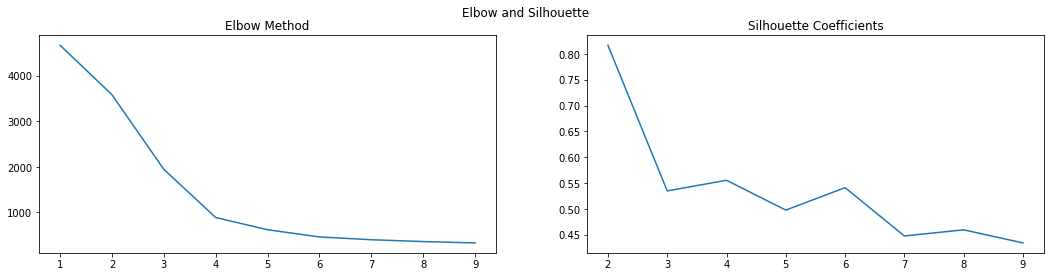

In [117]:
best_k(1,10,1,mca,10,100)

### DBSCAN Categorico

In [118]:
dbscan = DBSCAN(eps=0.6)

In [119]:
dbscan.fit(mca)

DBSCAN(eps=0.6)

In [120]:
dbscan_silhouette_c = silhouette_score(mca, dbscan.labels_).round (2)

### K means Categorico

In [121]:
kmeans_c = KMeans(n_clusters=4)

In [122]:
kmeans_c.fit(mca)

KMeans(n_clusters=4)

In [123]:
kmeans_silhouette_c = silhouette_score(mca, kmeans_c.labels_).round(2)

In [124]:
print('kmeans:', kmeans_silhouette_c ,'dbscan:', dbscan_silhouette_c, sep='\n')

kmeans:
0.55
dbscan:
0.77


### Minibatch

In [125]:
# Create k-mean object
cat_mb_km= MiniBatchKMeans(n_clusters=4, random_state=0, batch_size=100)


In [126]:
# Train model
model_mini_cat = cat_mb_km.fit(mca)

C:\Users\jonat\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:888: UserWarning:

MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1



In [127]:
model_mini_cat.labels_

array([1, 2, 3, ..., 3, 3, 1])

In [128]:
kmini_silhouette_mca = silhouette_score(mca, model_mini_cat.labels_)
print(kmini_silhouette_mca)

0.4314741896650337


In [129]:
# se transforman como una lista
cluster_kmeans_c = pd.Series(kmeans_c.labels_)
cluster_db_c = pd.Series(dbscan.labels_)
cat_k_mini = pd.Series(model_mini_cat.labels_)

In [130]:
#se unen al dataset de variables categoricas
cat_df["clust_kmeans"] = cluster_kmeans_c
cat_df["clust_dbscan"] = cluster_db_c
cat_df["clust_minibatch"] = cat_k_mini

Text(0.5, 1.0, 'Cluster Minibatch')

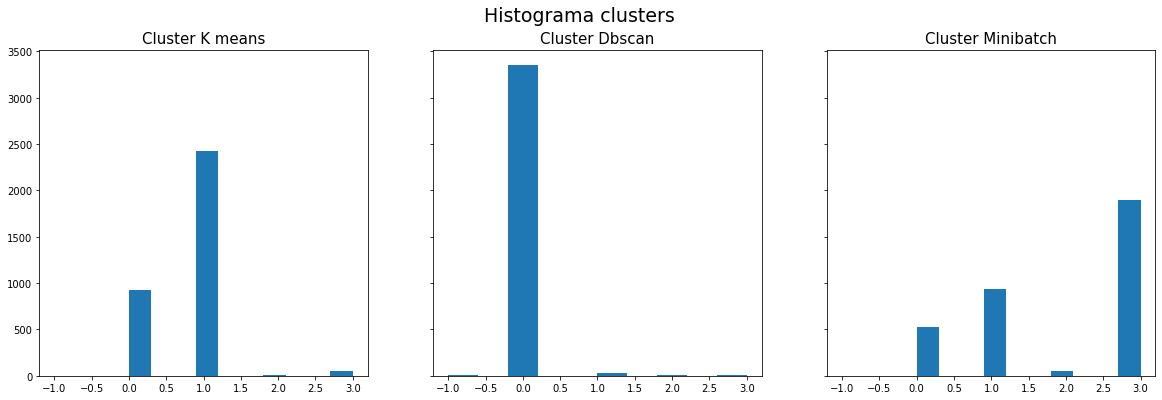

In [131]:
fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(20, 6), sharex=True, sharey=True)

fig.suptitle(f"Histograma clusters", fontsize=19)

# The k-means plot

ax1.hist(cluster_kmeans_c)
ax1.set_title("Cluster K means",fontsize=15)

ax2.hist(cluster_db_c)
ax2.set_title("Cluster Dbscan",fontsize=15)

ax3.hist(cat_k_mini)
ax3.set_title("Cluster Minibatch",fontsize=15)


In [132]:
cat_df.head()

year_added month_added release_year     type  clust_kmeans  \
17189     2020.0        11.0         1994    Movie           NaN   
7845      2021.0         1.0         2017  TV Show           NaN   
3985      2017.0        11.0         2017    Movie           NaN   
6678      2020.0         9.0         2020  TV Show           NaN   
16069     2020.0         4.0         2020  TV Show           NaN   

       clust_dbscan  clust_minibatch  
17189           NaN              NaN  
7845            NaN              NaN  
3985            NaN              NaN  
6678            NaN              NaN  
16069           NaN              NaN

# System Recomendation

In [133]:
dummy_reduced

array([[ 2.91427528e-02, -9.67479701e-01,  1.99995434e-01, ...,
         9.01427400e-03,  7.56614628e-03,  1.04809236e-02],
       [-6.76905316e-01, -5.72640166e-02, -3.66053943e-01, ...,
         2.26227709e-03, -5.73648818e-04,  3.71361498e-04],
       [ 3.57283200e-01,  1.36009662e-01, -3.14380656e-01, ...,
        -3.05836962e-02, -1.47566503e-03,  6.19460441e-03],
       ...,
       [-8.29866240e-01, -5.51264726e-01,  4.81691067e-01, ...,
        -9.34128022e-04, -3.38320060e-04,  2.46309992e-03],
       [ 2.65394400e-02, -9.73756913e-01,  1.94566145e-01, ...,
        -5.69304259e-02,  6.20452720e-03, -4.64829721e-02],
       [-4.97482827e-01,  5.49141426e-01, -3.60307893e-01, ...,
        -4.59021303e-03,  1.84613578e-03, -1.42887986e-04]])

In [134]:
df_dummy

cast__0  cast__4minute  cast__50 cent  cast__a.r. rahman  cast__aadhi  \
17189        0              0              0                  0            0   
7845         0              0              0                  0            0   
3985         0              0              0                  0            0   
6678         0              0              0                  0            0   
16069        0              0              0                  0            0   
...        ...            ...            ...                ...          ...   
902          0              0              0                  0            0   
13504        0              0              0                  0            0   
4261         1              0              0                  0            0   
7127         0              0              0                  0            0   
14999        0              0              0                  0            0   

       cast__aamir khan  cast__aaron eckhart  cast__aaron hernandez  \
17189                 0                    0                      0   
7845                  0                    0                      0   
3985                  0                    0                      0   
6678                  0                    0                      0   
16069                 0                    0                      0   
...                 ...                  ...                    ...   
902                   0                    0                      0   
13504                 0                    0                      0   
4261                  0                    0                      0   
7127                  0                    0                      0   
14999                 0                    0                      0   

       cast__aaron paul  cast__aaron pedersen  ...  genre_Thriller  genre_War  \
17189                 0                     0  ...               0          0   
7845                  0                     0  ...               0          0   
3985                  0                     0  ...               0          0   
6678                  0                     0  ...               0          0   
16069                 0                     0  ...               0          0   
...                 ...                   ...  ...             ...        ...   
902                   0                     0  ...               0          0   
13504                 0                     0  ...               0          0   
4261                  0                     0  ...               0          0   
7127                  0                     0  ...               0          0   
14999                 0                     0  ...               0          0   

       genre_Western  cast__Adults  cast__Kids  cast__Older Kids  cast__Teens  \
17189              0             0           0                 1            0   
7845               0             1           0                 0            0   
3985               0             0           0                 1            0   
6678               0             0           0                 1            0   
16069              0             1           0                 0            0   
...              ...           ...         ...               ...          ...   
902                0             0           0                 1            0   
13504              0             1           0                 0            0   
4261               0             1           0                 0            0   
7127               0             0           0                 1            0   
14999              0             1           0                 0            0   

       clust_kmeans_Du  clust_dbscan_Du  clust_minibatch_Du  
17189              NaN              NaN                 NaN  
7845               NaN              NaN                 NaN  
3985               NaN              NaN                 NaN  

In [135]:
input_dummy = pd.DataFrame(dummy_reduced).set_index(df_dummy.index)
input_dummy

0         1         2         3         4         5         6     \
17189  0.029143 -0.967480  0.199995  0.752258 -0.518096 -0.340663 -0.074225   
7845  -0.676905 -0.057264 -0.366054 -0.683916 -0.463931 -0.478502  0.255002   
3985   0.357283  0.136010 -0.314381  1.027563  0.613434 -0.204622  0.581033   
6678   0.407050  0.278210 -0.745151  0.455448 -0.775940 -0.382946  0.281059   
16069 -0.554807  0.637143  0.259116  0.143299  0.407018  0.363109  0.894184   
...         ...       ...       ...       ...       ...       ...       ...   
902    0.438685  0.002236 -0.807334  1.046817  0.447255 -0.467937 -0.122144   
13504 -0.732792 -0.312417 -0.148218 -0.306897  0.053794 -0.090301  0.033068   
4261  -0.829866 -0.551265  0.481691 -0.062828 -0.237376  0.184884 -0.388317   
7127   0.026539 -0.973757  0.194566  0.766757 -0.471914 -0.325536 -0.078201   
14999 -0.497483  0.549141 -0.360308  0.047362 -0.013738  0.892519 -0.398189   

           7         8         9     ...      2183      2184      2185  \
17189 -0.157042 -0.232617  0.104656  ...  0.017723 -0.019460  0.003751   
7845  -0.041238 -0.072738 -0.082075  ...  0.000031  0.000745 -0.000703   
3985  -0.043849 -0.538545 -0.293003  ...  0.060333 -0.007523 -0.022566   
6678  -0.014607 -0.402724  0.033377  ... -0.019724  0.004494 -0.012839   
16069  0.287667 -0.086042  0.037834  ...  0.001384  0.000441  0.002102   
...         ...       ...       ...  ...       ...       ...       ...   
902    0.149214 -0.155944 -0.069925  ...  0.001151  0.000855  0.002700   
13504  0.004036  0.156071  0.047344  ... -0.018057 -0.026694  0.021744   
4261  -0.338808  0.057522  0.121453  ...  0.000839  0.000519  0.002629   
7127  -0.138191 -0.183297  0.097687  ... -0.020808 -0.003183 -0.049972   
14999 -0.030668 -0.274130 -0.179555  ... -0.002308  0.001121 -0.002310   

           2186      2187      2188      2189      2190      2191      2192  
17189 -0.015504 -0.003456 -0.000477 -0.020237  0.009014  0.007566  0.010481  
7845  -0.000141 -0.000254  0.001352  0.001309  0.002262 -0.000574  0.000371  
3985   0.017754 -0.041941 -0.016999 -0.058888 -0.030584 -0.001476  0.006195  
6678  -0.015258  0.009155 -0.005251  0.001677  0.010566  0.005116 -0.005989  
16069 -0.000877  0.001953  0.008085 -0.000312  0.001298  0.001851 -0.008244  
...         ...       ...       ...       ...       ...       ...       ...  
902    0.001394  0.002760 -0.000175  0.000530  0.001573 -0.000088  0.000372  
13504  0.006758 -0.019597 -0.022801  0.009567  0.007288 -0.006553  0.010407  
4261   0.000112 -0.002884  0.001258 -0.000687 -0.000934 -0.000338  0.002463  
7127   0.047350 -0.009968  0.040210 -0.040362 -0.056930  0.006205 -0.046483  
14999 -0.002270  0.007188  0.004292  0.000957 -0.004590  0.001846 -0.000143  

[3406 rows x 2193 columns]

In [136]:
data.iloc[647,:]

show_id                                                       s928
type                                                         Movie
cast             Jamie Bell, Gary Lewis, Stuart Wells, Billy Fa...
country                                     United Kingdom, France
date_added                                     2019-02-01 00:00:00
release_year                                                  2000
rating                                                           R
duration                                                   110 min
description      When a boy trades boxing school for ballet les...
originalTitle                                         Billy Elliot
isAdult                                                          0
genres                                                 Drama,Music
averageRating                                                  7.7
numVotes                                                    127068
year_added                                                  20

In [137]:
out_dummy = pd.DataFrame(kmeans_dummy.labels_, index = df_dummy.index)
df_m1 = data[['show_id','originalTitle']]
df_m1.iloc[1513,:]
print(len(df_m1),len(out_dummy))

5678 3406


In [138]:
df_m1

show_id          originalTitle
1          s1                     3%
2          s2                   7:19
3          s3                  23:59
12         s4                      9
21         s5                     21
...       ...                    ...
20291   s7781                    Zoo
20304   s7782                   Zoom
20306   s7783                   Zozo
20308   s7784                 Zubaan
20309   s7786  Zumbo's Just Desserts

[5678 rows x 2 columns]

In [139]:
titulos = df_m1.join(out_dummy, how='inner').rename(columns={0:'cluster'})
#titulos.isna().value_counts()
titulos_cluster = titulos.groupby('cluster').show_id.agg([list,'count'])
titulos.tail(50)

show_id                                originalTitle  cluster
20087   s7671                          World's Most Wanted        1
20091   s7673                                     Wormwood        1
20093   s7674                             Would You Rather        0
20095   s7676                                    Wrong No.        1
20096   s7677                              Wrong Side Raju        0
20098   s7679                                   WWII in HD        1
20099   s7681                        Wyatt Cenac: Brooklyn        0
20111   s7688                                           XX        0
20112   s7694                                      Yaadein        1
20115   s7697                        Yamla Pagla Deewana 2        1
20116   s7698                          Yanda Kartavya Aahe        3
20120   s7700            Yanxi Palace: Princess Adventures        1
20123   s7704                              Yeh Meri Family        3
20125   s7706                                      Yes Man        1
20129   s7707                                    Yes or No        3
20132   s7711                                Yes, God, Yes        0
20134   s7715                                  Yoga Hosers        1
20138   s7716                                         Yoko        3
20139   s7721                         YooHoo to the Rescue        3
20149   s7723                              You Are My Home        3
20150   s7724                                 You Can Tutu        3
20151   s7728                          You Changed My Life        3
20152   s7729                You Don't Mess with the Zohan        0
20154   s7730                                   You Get Me        2
20155   s7731                                 You vs. Wild        3
20162   s7739                              Young Wallander        0
20164   s7744                              Yours Fatefully        1
20165   s7745                  Yours Sincerely, Kanan Gill        0
20172   s7750                                    Yu-Gi-Oh!        3
20173   s7751                              Yu-Gi-Oh! Arc-V        3
20174   s7752                                      Yucatán        0
20178   s7754                                   Yunus Emre        3
20182   s7755                                         Yuva        1
20183   s7756                                     Z Nation        0
20185   s7758  Zach Galifianakis: Live at the Purple Onion        0
20187   s7759                   Zack and Miri Make a Porno        0
20192   s7762                                       Zapped        3
20193   s7763                                     Zed Plus        0
20223   s7765                                         Zero        1
20243   s7768                           Zindagi Gulzar Hai        3
20245   s7770                     Zindagi Na Milegi Dobara        1
20247   s7771                                      Zinzana        0
20260   s7775                                       Zodiac        0
20261   s7776                                   Zoids Wild        3
20262   s7777                                     Zokkomon        2
20263   s7778                                  Zombie Dumb        3
20268   s7780                                    Zona Rosa        0
20291   s7781                                          Zoo        0
20306   s7783                                         Zozo        0
20308   s7784                                       Zubaan        1

In [140]:
from random import sample 
input_s1 = 's2115'#lista de series vistas
recomendaciones = titulos_cluster.list.apply(lambda x: x if input_s1 in x else None).dropna()
#recomendaciones.iloc[0]

top_ten = sample(recomendaciones.iloc[0],10)
data_top = pd.DataFrame(top_ten).rename(columns={0:'show_id'})

#volverlo dataframe, join left con lo tabla de titulos [id, titulos] how = left

In [141]:
data_top

show_id
0   s2520
1   s2355
2   s6570
3   s5023
4   s2134
5   s1726
6   s2678
7   s6215
8   s5050
9   s3690

In [142]:
df_f = data.show_id == 's7750'
data[df_f]

show_id     type                                               cast  \
20172   s7750  TV Show  Dan Green, Eric Stuart, Amy Birnbaum, Darren D...   

      country           date_added  release_year rating   duration  \
20172   Japan  2020-07-08 00:00:00          2005  TV-Y7  2 Seasons   

                                             description originalTitle  \
20172  The lives of young Yugi Moto and his friends J...     Yu-Gi-Oh!   

      isAdult                      genres  averageRating  numVotes  \
20172       0  Adventure,Animation,Comedy            7.9      1570   

       year_added  month_added  day_added target_ages  
20172      2020.0          7.0        8.0  Older Kids

In [143]:
t= pd.merge(data_top,df_m1, how="left", on='show_id')
t

show_id                        originalTitle
0   s2520            Grandmother's Farm Part 2
1   s2355                    Gardeners of Eden
2   s6570                      The Last Shaman
3   s5023                                 Qila
4   s2134                                Fatso
5   s1726                         Deviant Love
6   s2678                        Heartbreakers
7   s6215                           The Chosen
8   s5050                   Rab Se Sohna Isshq
9   s3690  Lo más sencillo es complicarlo todo

In [144]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [145]:
def mvp_recommender(id_title):#input data
    
    out_dummy = pd.DataFrame(kmeans_dummy.labels_, index = df_dummy.index)
    df_m1 = data[['show_id','originalTitle']]
        
    titulos = df_m1.join(out_dummy, how='inner').rename(columns={0:'cluster'})
    #titulos.isna().value_counts()
    titulos_cluster = titulos.groupby('cluster').show_id.agg([list,'count'])
    titulos
    
    from random import sample 
    input_s1 = id_title #lista de series vistas
    recomendaciones = titulos_cluster.list.apply(lambda x: x if input_s1 in x else None).dropna()
    #recomendaciones.iloc[0]
    
    top_ten = sample(recomendaciones.iloc[0],10)
    data_top = pd.DataFrame(top_ten).rename(columns={0:'show_id'})
    t= pd.merge(data_top,df_m1, how="left", on='show_id')
    print(t)
    
    return 

In [146]:
interact(mvp_recommender, id_title= 's7750')

interactive(children=(Text(value='s7750', description='id_title'), Output()), _dom_classes=('widget-interact',…

<function __main__.mvp_recommender(id_title)>

In [147]:
def sys_recommender(id_title,):#input data
    
    from random import sample
    #debe ingresar : cual es el centroide del algoritmo a usar y el data set del cluster que se usara
    
    out_centroide = pd.DataFrame(kmeans_dummy.labels_, index = df_dummy.index)
    data_inicial = data[['show_id','originalTitle']]
        
    titulos = data_inicial.join(out_centroide, how='inner').rename(columns={0:'cluster'})
    titulos_cluster = titulos.groupby('cluster').show_id.agg([list,'count'])
         
    input_serie = id_title #lista de series vistas
    recomendaciones = titulos_cluster.list.apply(lambda x: x if input_serie in x else None).dropna()
    #recomendaciones.iloc[0]
    
    top_ten = sample(recomendaciones.iloc[0],10)
    data_top = pd.DataFrame(top_ten).rename(columns={0:'show_id'})
    top_recomedacion = pd.merge(data_top, data_inicial, how="left", on='show_id')
    print(top_recomedacion)
    
    return